PART - 1

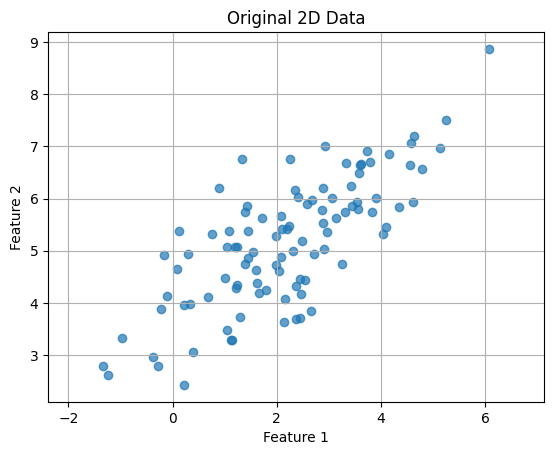

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Plot the original data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [28]:
# Step 3: Center the data
X_centered = X - np.mean(X, axis=0)

In [29]:
# Step 4: Covariance matrix
cov_matrix = np.cov(X_centered.T)

In [30]:
# Step 5: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [31]:
# Step 6: Sort eigenvectors by eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]
eigenvalues = eigenvalues[idx]

In [32]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered.T)  
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvals)
print("Eigenvectors:", eigenvecs)

Eigenvalues: [3.34538606 0.43692116]
Eigenvectors: [[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


In [33]:
# Step 7: Project data onto first principal component
X_pca = X_centered @ eigenvectors[:, 0]


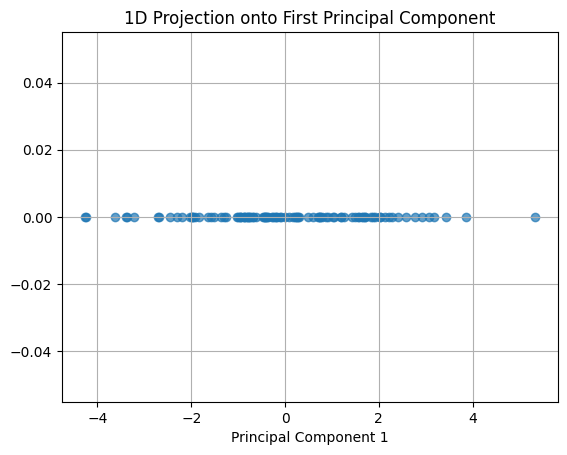

In [34]:
# Step 8: Plot 1D projection
plt.scatter(X_pca, np.zeros_like(X_pca), alpha=0.7)
plt.title("1D Projection onto First Principal Component")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

In [35]:
# Step 9: Variance explained
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Variance explained by each component:", explained_variance)


Variance explained by each component: [0.8844829 0.1155171]


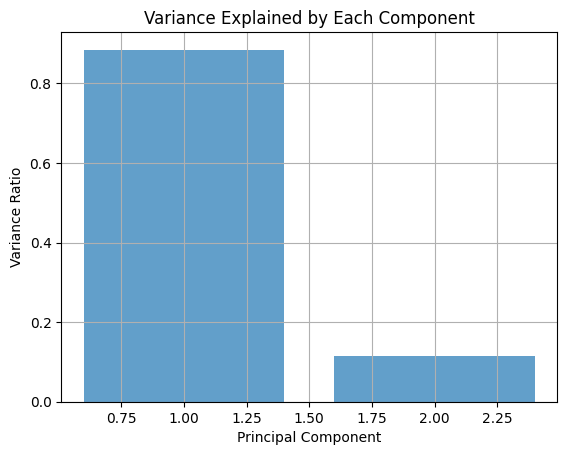

In [36]:
# Plot variance explained
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.title("Variance Explained by Each Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.grid(True)
plt.show()

PART - 2

In [37]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Step 1: Load digits dataset
digits = load_digits()
X = digits.data  # shape (1797, 64)
y = digits.target

print("Shape of X:", X.shape)
print("64 features represent:", "8x8 pixel values flattened into a vector.")

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)


Shape of X: (1797, 64)
64 features represent: 8x8 pixel values flattened into a vector.


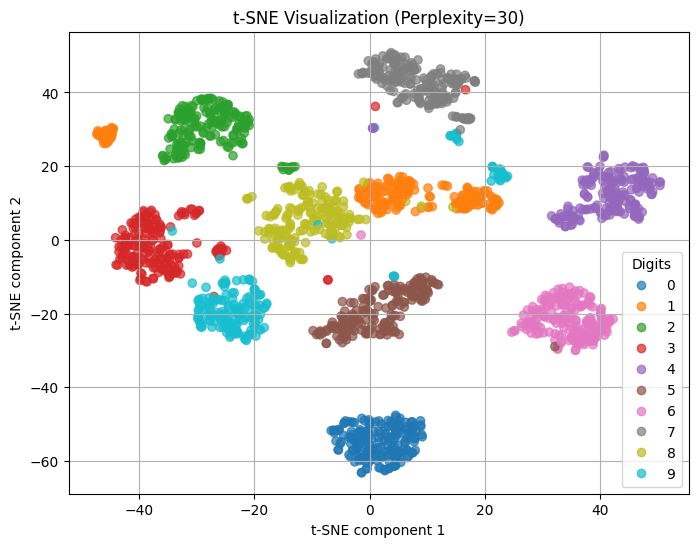

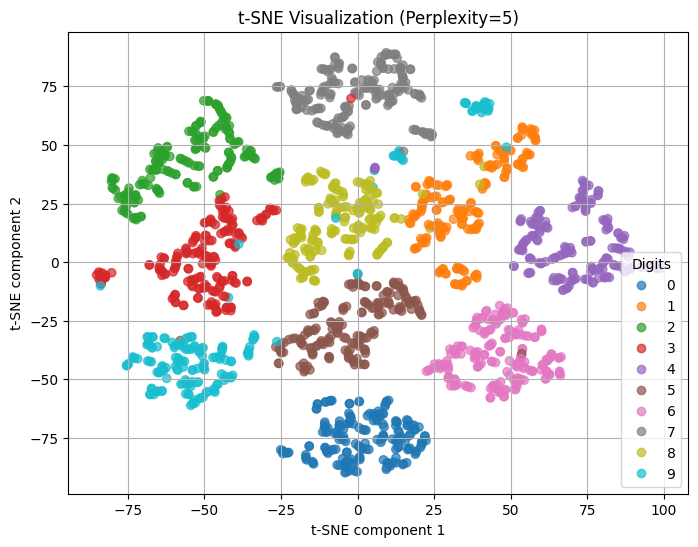

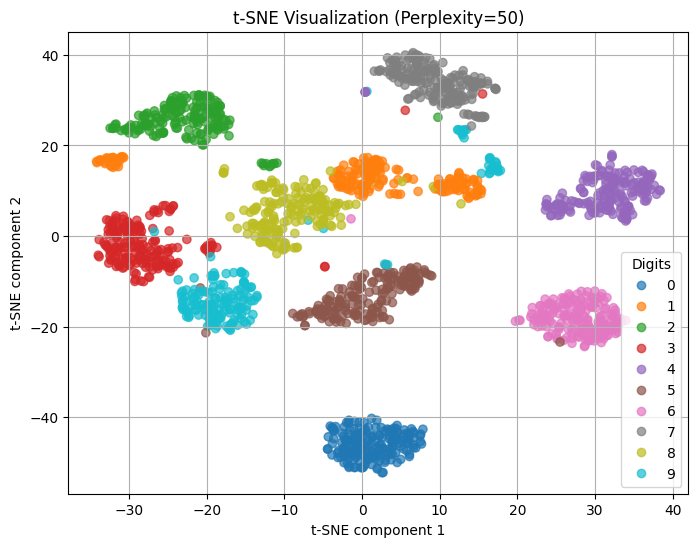

In [38]:
# Step 3: Visualize t-SNE output
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("t-SNE Visualization (Perplexity=30)")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.grid(True)
plt.show()

# Step 4: Try different perplexities
for perplexity in [5, 50]:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(f"t-SNE Visualization (Perplexity={perplexity})")
    plt.xlabel("t-SNE component 1")
    plt.ylabel("t-SNE component 2")
    plt.grid(True)
    plt.show()
